In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2,NaN,1.0,1.0,NaN,NaN,3.0,NaN,1
680,5,10.0,NaN,NaN,NaN,10.0,NaN,6.0,3
681,1,NaN,1.0,3.0,NaN,NaN,NaN,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	99
float64		column 3	202
float64		column 4	165
float64		column 5	198
float64		column 6	169
float64		column 7	202
float64		column 8	169
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,584.000000,481.000000,518.000000,485.000000,514.000000,481.000000,514.000000,683.000000
mean,4.442167,3.011986,2.993763,2.694981,3.022680,3.418288,3.301455,2.677043,1.603221
std,2.820761,2.923530,2.833939,2.722429,2.012744,3.565885,2.370517,2.879107,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

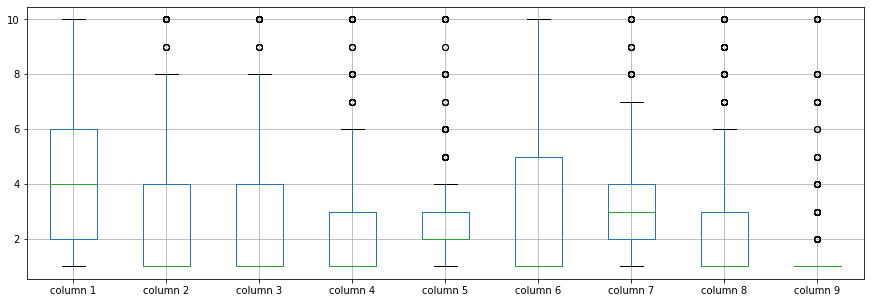

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.011986
column 3    2.993763
column 4    2.694981
column 5    3.022680
column 6    3.418288
column 7    3.301455
column 8    2.677043
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.641458,0.626575,0.440112,0.475361,0.574925,0.523390,0.494425,0.350957
column 2,0.641458,1.000000,0.890944,0.641999,0.692807,0.696794,0.724084,0.676810,0.411507
column 3,0.626575,0.890944,1.000000,0.636568,0.657691,0.695862,0.700945,0.660861,0.448226
column 4,0.440112,0.641999,0.636568,1.000000,0.559346,0.666260,0.659790,0.573441,0.381314
column 5,0.475361,0.692807,0.657691,0.559346,1.000000,0.547072,0.571657,0.582324,0.352501
column 6,0.574925,0.696794,0.695862,0.666260,0.547072,1.000000,0.689531,0.544231,0.327435
column 7,0.523390,0.724084,0.700945,0.659790,0.571657,0.689531,1.000000,0.633823,0.308459
column 8,0.494425,0.676810,0.660861,0.573441,0.582324,0.544231,0.633823,1.000000,0.421123
column 9,0.350957,0.411507,0.448226,0.381314,0.352501,0.327435,0.308459,0.421123,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [9,9+40,9+40+40,9+40+40,9+40+40+40+40,9+40+40+40,9+40+40,9+40,9], vae_layer = False, seed = 400)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 28.066534632728214
Epoch: 1 , loss: 28.133658318292525
Epoch: 2 , loss: 28.121481032598588
Epoch: 3 , loss: 27.970300447373162
Epoch: 4 , loss: 27.88937518710182
Epoch: 5 , loss: 27.505497296651203
Epoch: 6 , loss: 25.90183725811186
Epoch: 7 , loss: 24.852639607020787
Epoch: 8 , loss: 24.523988087972004
Epoch: 9 , loss: 23.827986626397994
Epoch: 10 , loss: 23.188036487216042
Epoch: 11 , loss: 22.767106010800315
Epoch: 12 , loss: 22.491875353313628
Epoch: 13 , loss: 22.04111369450887
Epoch: 14 , loss: 21.751347882407053
Epoch: 15 , loss: 21.564040660858154
Epoch: 16 , loss: 21.448167551131476
Epoch: 17 , loss: 20.97085344223749
Epoch: 18 , loss: 20.843322458721342
Epoch: 19 , loss: 20.377464180900937
Epoch: 20 , loss: 19.994103113810223
Epoch: 21 , loss: 20.543126605805895
Epoch: 22 , loss: 20.194245588211786
Epoch: 23 , loss: 20.133502210889542
Epoch: 24 , loss: 19.55498495556059
Epoch: 25 , loss: 19.64

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.548373
column 3    1.000000
column 4    1.357854
column 5    1.442008
column 6    1.000000
column 7    2.000000
column 8    1.289656
column 9    1.000000
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,1.029568,0.00000,0.000000,-0.159612,1.116892,-0.976525,0.000000,0
1,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0
679,0,-0.476354,0.00000,0.000000,-1.466992,-0.525190,0.000000,-0.595472,0
680,0,0.000000,-9.53306,-9.568702,-3.481127,0.000000,-4.473718,0.000000,0
681,0,0.512595,0.00000,0.000000,-0.602915,0.627559,0.581754,0.000000,0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(122.76116799783047, 335.3281974424459)

In [18]:
NRMS=numerator/denominator
NRMS


0.366092589093706

In [19]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,2.029568,1.00000,1.000000,1.840388,2.116892,2.023475,1.000000,1
1,5,4.000000,4.00000,5.000000,7.000000,10.000000,3.000000,2.000000,1
2,3,1.000000,1.00000,1.000000,2.000000,2.000000,3.000000,1.000000,1
3,6,8.000000,8.00000,1.000000,3.000000,4.000000,3.000000,7.000000,1
4,4,1.000000,1.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3,1.000000,1.00000,1.000000,2.000000,1.000000,2.000000,1.000000,1
679,2,0.523646,1.00000,1.000000,0.533008,0.474810,3.000000,0.404528,1
680,5,10.000000,0.46694,0.431298,0.518873,10.000000,0.526282,6.000000,3
681,1,1.512595,1.00000,3.000000,1.397085,1.627559,1.581754,1.000000,1


In [21]:
imputations[-1].to_excel("BCW_AL_20(imp).xlsx", index=False, header=False)